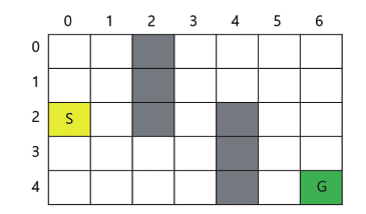

In [11]:
from IPython.display import Image
Image('gridworld.png')

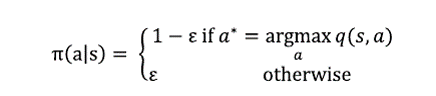

In [12]:
Image('formula.png')

In [13]:
import random 
import numpy as np

In [14]:
class GridWorld():
    def __init__(self): 
        self.x = 0 
        self.y = 0 
        
    def step(self, a): 
        if a == 0:
            self.move_left() 
        elif a ==1: 
            self.move_up()
        elif a ==2: 
            self.move_right()
        elif a ==3: 
            self.move_down()
            
        reward = -1 
        done = self.is_done() 
        
        return (self.x, self.y), reward, done
    
    def move_left(self):
        if self.y == 0:
            pass 
        elif self.y == 3 and self.x in [0, 1, 2]:
            pass 
        elif self.y == 5 and self.x in [2, 3, 4]:
            pass 
        else:
            self.y -= 1
    
    def move_right(self):
        if self.y == 1 and self.x in [0, 1, 2]:
            pass 
        elif self.y == 3 and self.x in [2, 3, 4]:
            pass 
        elif self.y == 6:
            pass 
        else:
            self.y += 1
    
    def move_up(self):
        if self.x == 0:
            pass 
        elif self.x == 3 and self.y == 2:
            pass 
        else:
            self.x -= 1
            
    def move_down(self):
        if self.x == 4:
            pass 
        elif self.x == 1 and self.y == 4:
            pass 
        else:
            self.x += 1
            
    def is_done(self):
        if self.x == 4 and self.y == 6:
            return True
        else:
            return False
        
    def reset(self):
        self.x = 0 
        self.y = 0 
        
        return (self.x, self.y)
            
    
    

In [15]:
class QAgent(): 
    def __init__(self):
        self.q_table = np.zeros((5, 7, 4))
        self.eps = 0.9 
        
    def select_action(self, s):
        x, y = s
        coin = random.random() 
        
        if coin < self.eps:
            action = random.randint(0, 3)
        else:
            action_val = self.q_table[x, y, :]
            action = np.argmax(action_val) 
            
        return action
    
    def update_table(self, hist): 
        cum_reward = 0 
        
        # for h in hist[::-1]:
        s, a, r, s_prime = hist
        x, y = s
        next_x, next_y = s_prime
        a_prime = self.select_action(s_prime)
        
        self.q_table[x, y, a] = self.q_table[x, y, a] + 0.1 * (r + self.q_table[next_x, next_y, a_prime] - self.q_table[x, y, a])
        cum_reward = cum_reward + r
            
    def anneal_eps(self): 
        self.eps -= 0.03 
        self.eps = max(self.eps, 0.1)
        
    def show_table(self): 
        q_lst = self.q_table.tolist() 
        data = np.zeros((5, 7))
        
        for row_idx in range(len(q_lst)):
            row = q_lst[row_idx]
            
            for col_idx in range(len(row)):
                col = row[col_idx]
                action = np.argmax(col) 
                data[row_idx, col_idx] = action 
                
        print(data)

In [19]:
def main():
    env = GridWorld()
    agent = QAgent() 
    
    for n_epi in range(1000):
        done = False
        # history = [] 
        
        s = env.reset() 
        
        while not done:
            a = agent.select_action(s) 
            s_prime, r, done = env.step(a) 
            agent.update_table((s, a, r, s_prime))
            s = s_prime
            
        agent.anneal_eps()
        
    agent.show_table()
            

In [20]:
main()

[[2. 3. 0. 2. 2. 3. 3.]
 [2. 3. 0. 2. 2. 2. 3.]
 [3. 3. 0. 1. 0. 3. 3.]
 [2. 2. 2. 1. 0. 3. 3.]
 [0. 0. 3. 1. 0. 2. 0.]]
